In [2]:
import numpy as np
import pandas as pd
import cv2
import os

In [3]:
img_label_file = "data/labels.csv"

labels_csv = pd.read_csv(img_label_file, index_col=0)
labels = labels_csv.loc["fall-01"]
label_1 = labels.loc[labels["frame"] == 1]
label_1.label

fall name
fall-01   -1
Name: label, dtype: int64

In [4]:
### Read in the data
img_data_dir = "data/images/" # replace with your own dir if necessary
img_label_file = "data/labels.csv"

## Given an image name, extracts the label from the labels.csv file. True if 1 False if -1
def extract_label(file_name):
    split = file_name.split("-") # split image name
    fall_name = split[0] + "-" + split[1] # reconstruct fall name
    frame = int(split[-1].split(".")[0]) # end of split is like 113.png. removes .png part
    fall_labels = labels_csv.loc[fall_name]
    frame_label = fall_labels.loc[fall_labels["frame"] == frame]
    return int(frame_label.label) > 0

### Loads in the data from images and stores it in an array. Order is important because 
### The labels are in the same order as the images are appended to the array
def load_img_data():
    imgs = []
    labels = []
    labels_csv = pd.read_csv(img_label_file)
    
    # Iterates through fall folders and the frames within each fall
    for img_folder in os.listdir(img_data_dir):
        path = os.path.join(img_data_dir,img_folder)
        if ("fall" in path and "zip" not in path):
            for file in os.listdir(path):
                img = cv2.imread(os.path.join(path, file))
                img = cv2.resize(img ,(224,224))
                img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                imgs.append(img)
                labels.append([extract_label(file)])
                
    return imgs, labels

In [5]:
images, labels = load_img_data()

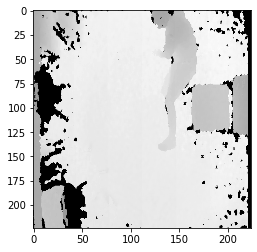

In [6]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [7]:
from sklearn.model_selection import train_test_split
images = np.asarray(images)
labels = np.asarray(labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33)


In [8]:
# starter model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
          


Using TensorFlow backend.


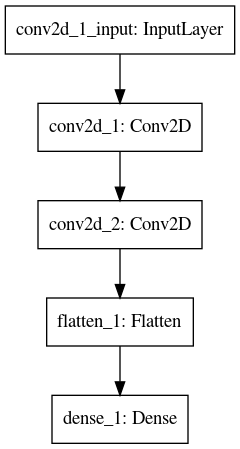

In [9]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

In [10]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
#train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
4013/4013 [==============================] - 26s 6ms/step - loss: 0.8873 - accuracy: 0.6778
Epoch 2/5
4013/4013 [==============================] - 23s 6ms/step - loss: 0.2610 - accuracy: 0.8916
Epoch 3/5
4013/4013 [==============================] - 23s 6ms/step - loss: 0.0598 - accuracy: 0.9818
Epoch 4/5
4013/4013 [==============================] - 23s 6ms/step - loss: 0.0324 - accuracy: 0.9918
Epoch 5/5
4013/4013 [==============================] - 23s 6ms/step - loss: 0.0797 - accuracy: 0.9766


In [12]:
model.evaluate(X_test, y_test)

1977/1977 [==============================] - 5s 3ms/step


[0.3365812097979002, 0.8846737742424011]

In [15]:
y_pred = model.predict(X_test)


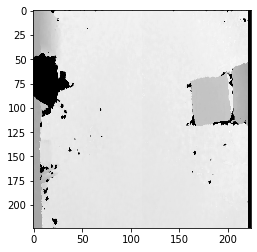

Image is [False]but was misclassified as [ True]


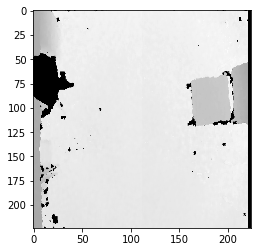

Image is [False]but was misclassified as [ True]


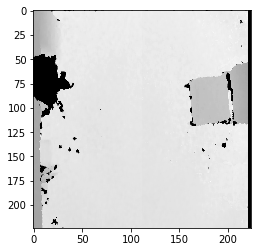

Image is [False]but was misclassified as [ True]


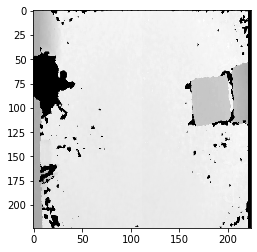

Image is [False]but was misclassified as [ True]


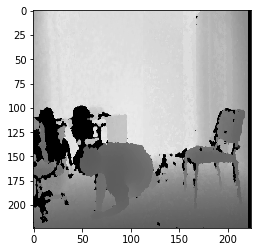

Image is [False]but was misclassified as [ True]


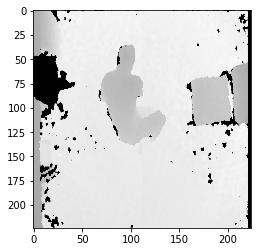

Image is [False]but was misclassified as [ True]


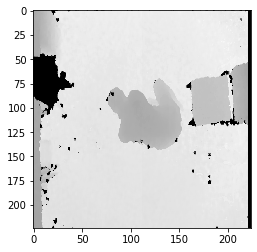

Image is [False]but was misclassified as [ True]


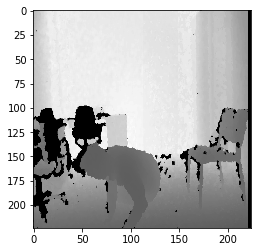

Image is [False]but was misclassified as [ True]


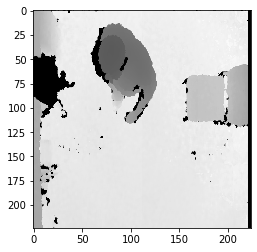

Image is [False]but was misclassified as [ True]


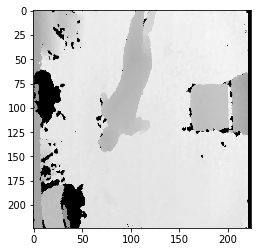

Image is [False]but was misclassified as [ True]


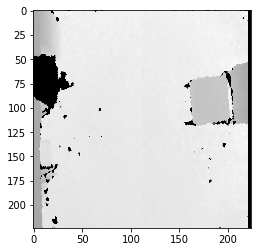

Image is [False]but was misclassified as [ True]


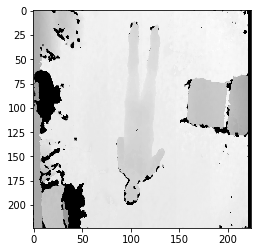

Image is [ True]but was misclassified as [False]


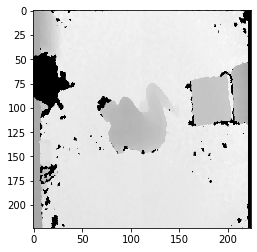

Image is [False]but was misclassified as [ True]


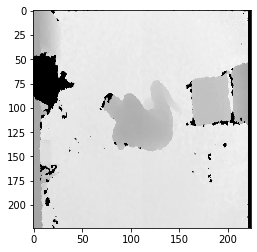

Image is [False]but was misclassified as [ True]


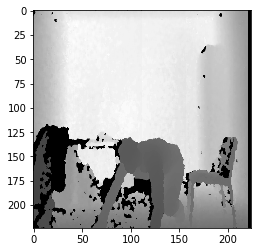

Image is [False]but was misclassified as [ True]


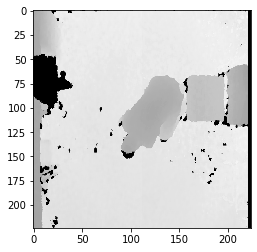

Image is [False]but was misclassified as [ True]


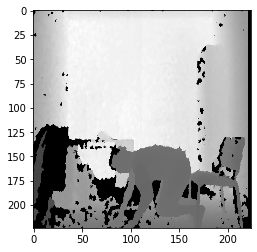

Image is [False]but was misclassified as [ True]


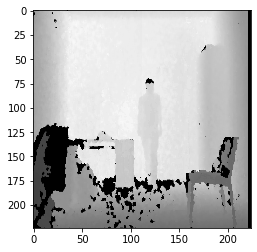

Image is [False]but was misclassified as [ True]


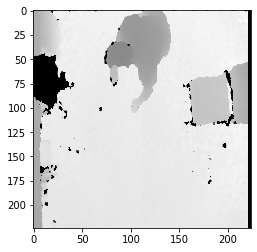

Image is [False]but was misclassified as [ True]


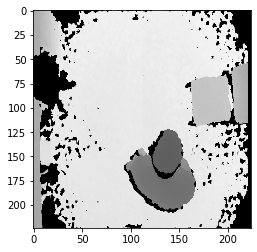

Image is [False]but was misclassified as [ True]


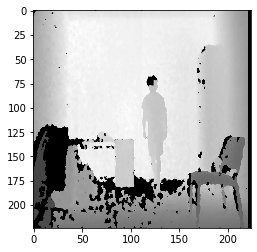

Image is [False]but was misclassified as [ True]


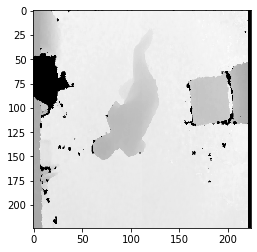

Image is [False]but was misclassified as [ True]


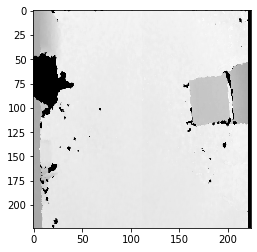

Image is [False]but was misclassified as [ True]


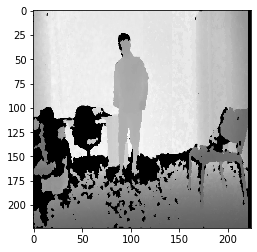

Image is [False]but was misclassified as [ True]


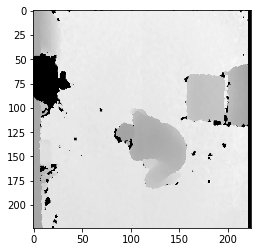

Image is [False]but was misclassified as [ True]


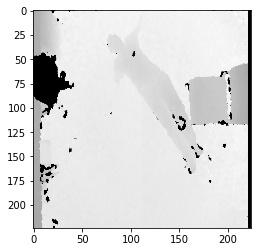

Image is [ True]but was misclassified as [False]


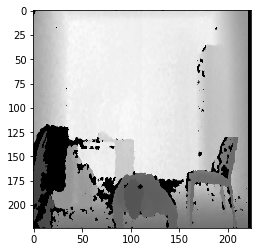

Image is [False]but was misclassified as [ True]


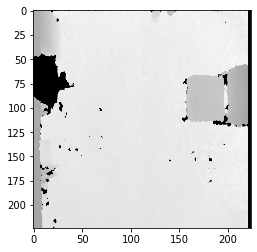

Image is [False]but was misclassified as [ True]


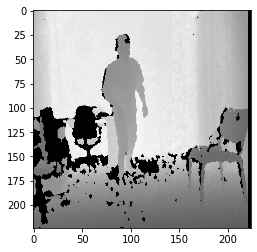

Image is [False]but was misclassified as [ True]


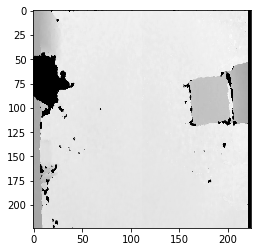

Image is [False]but was misclassified as [ True]


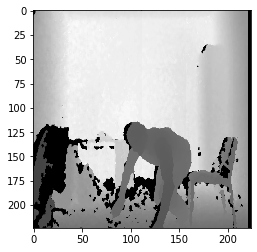

Image is [False]but was misclassified as [ True]


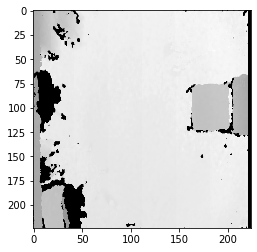

Image is [False]but was misclassified as [ True]


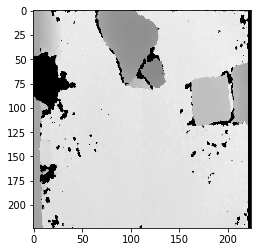

Image is [False]but was misclassified as [ True]


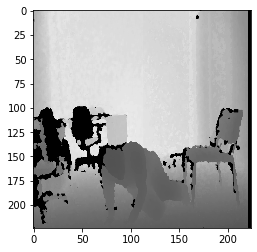

Image is [False]but was misclassified as [ True]


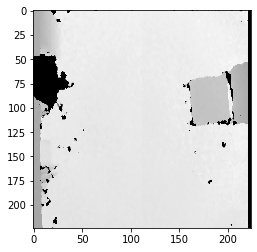

Image is [False]but was misclassified as [ True]


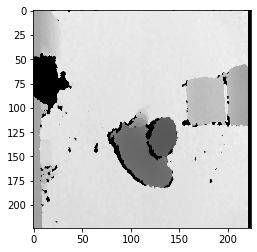

Image is [False]but was misclassified as [ True]


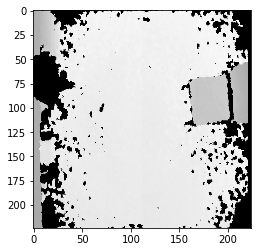

Image is [False]but was misclassified as [ True]


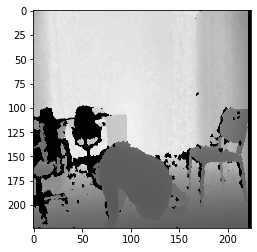

Image is [False]but was misclassified as [ True]


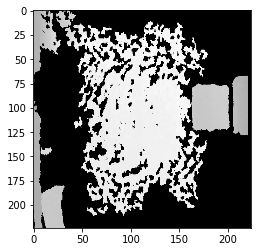

Image is [False]but was misclassified as [ True]


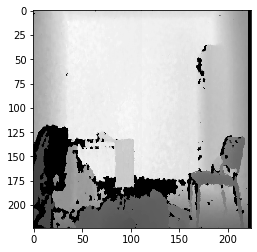

Image is [False]but was misclassified as [ True]


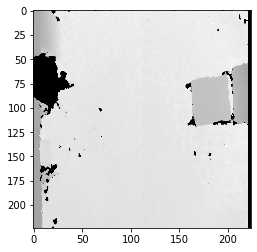

Image is [False]but was misclassified as [ True]


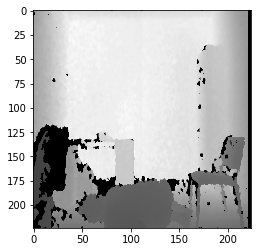

Image is [False]but was misclassified as [ True]


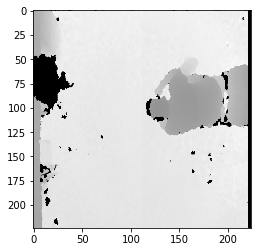

Image is [False]but was misclassified as [ True]


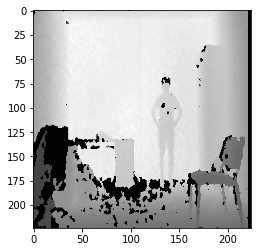

Image is [False]but was misclassified as [ True]


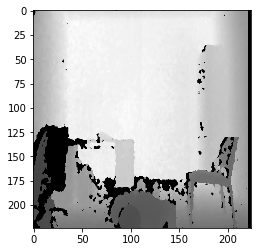

Image is [False]but was misclassified as [ True]


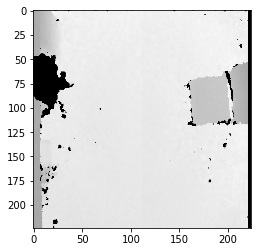

Image is [False]but was misclassified as [ True]


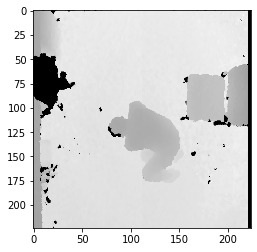

Image is [False]but was misclassified as [ True]


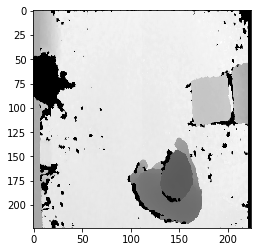

Image is [False]but was misclassified as [ True]


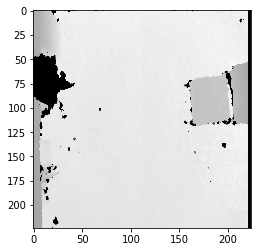

Image is [False]but was misclassified as [ True]


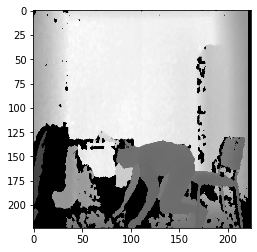

Image is [False]but was misclassified as [ True]


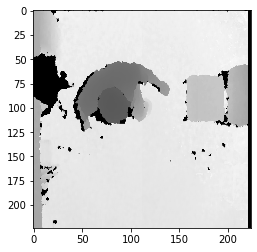

Image is [False]but was misclassified as [ True]


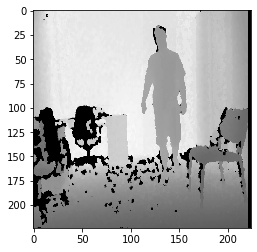

Image is [False]but was misclassified as [ True]


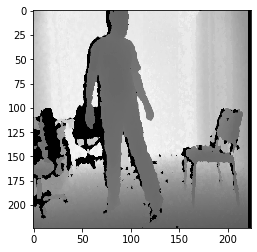

Image is [False]but was misclassified as [ True]


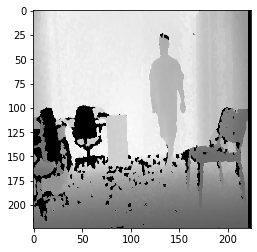

Image is [False]but was misclassified as [ True]


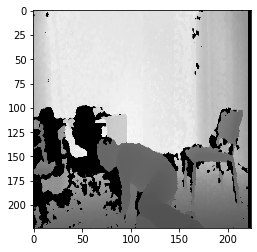

Image is [False]but was misclassified as [ True]


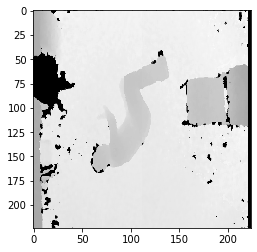

Image is [ True]but was misclassified as [False]


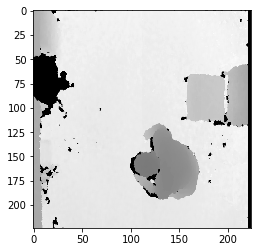

Image is [False]but was misclassified as [ True]


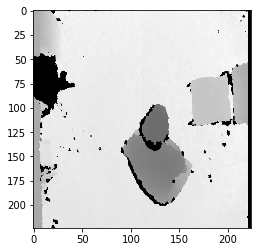

Image is [False]but was misclassified as [ True]


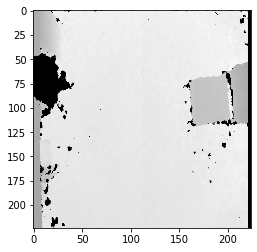

Image is [False]but was misclassified as [ True]


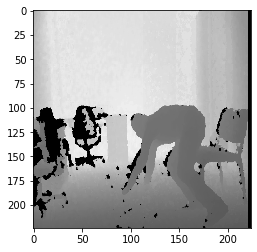

Image is [False]but was misclassified as [ True]


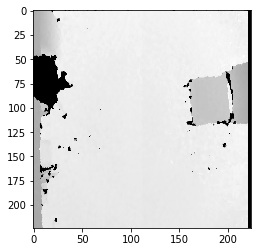

Image is [False]but was misclassified as [ True]


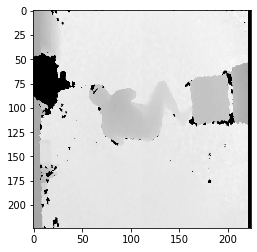

Image is [ True]but was misclassified as [False]


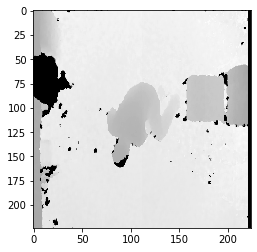

Image is [False]but was misclassified as [ True]


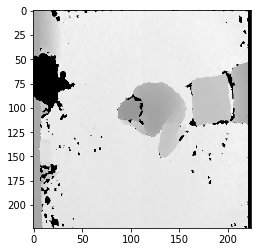

Image is [False]but was misclassified as [ True]


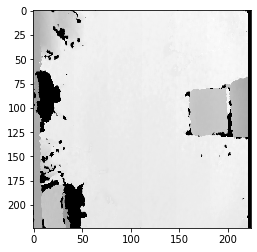

Image is [False]but was misclassified as [ True]


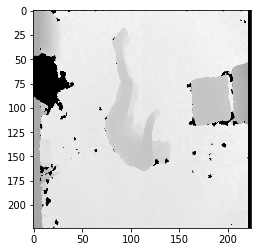

Image is [ True]but was misclassified as [False]


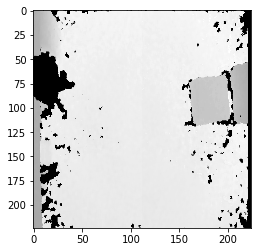

Image is [False]but was misclassified as [ True]


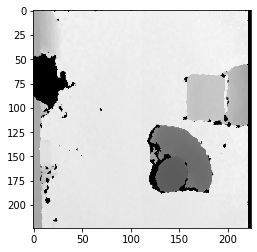

Image is [False]but was misclassified as [ True]


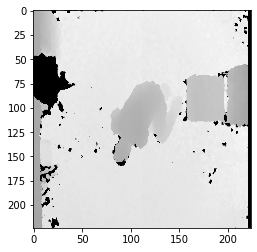

Image is [False]but was misclassified as [ True]


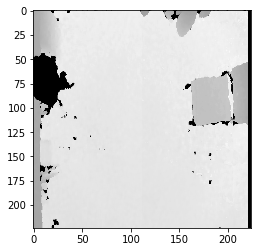

Image is [False]but was misclassified as [ True]


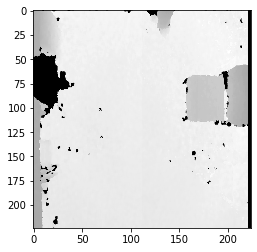

Image is [False]but was misclassified as [ True]


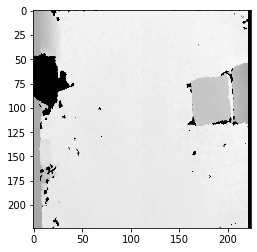

Image is [False]but was misclassified as [ True]


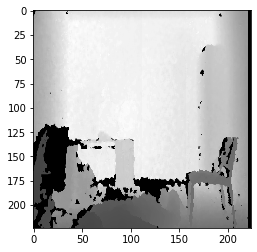

Image is [False]but was misclassified as [ True]


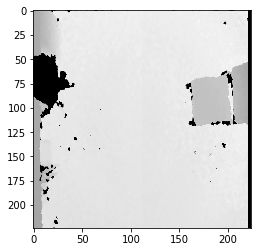

Image is [False]but was misclassified as [ True]


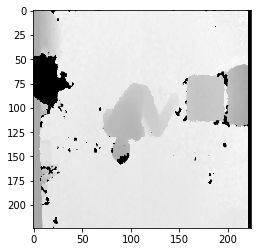

Image is [False]but was misclassified as [ True]


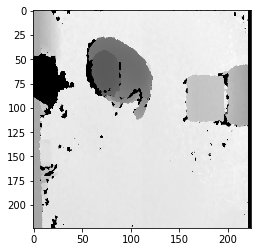

Image is [False]but was misclassified as [ True]


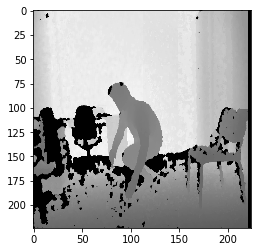

Image is [False]but was misclassified as [ True]


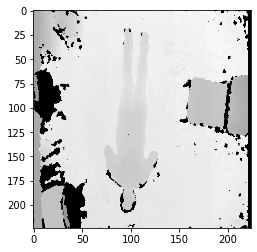

Image is [ True]but was misclassified as [False]


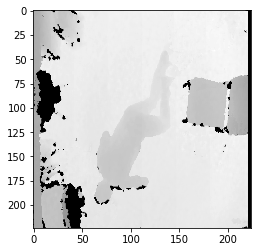

Image is [False]but was misclassified as [ True]


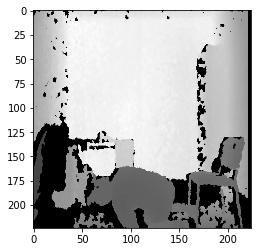

Image is [False]but was misclassified as [ True]


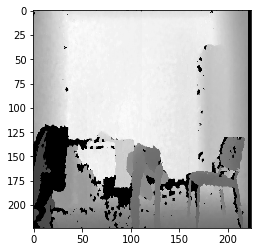

Image is [False]but was misclassified as [ True]


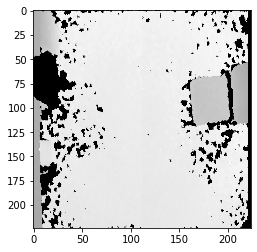

Image is [False]but was misclassified as [ True]


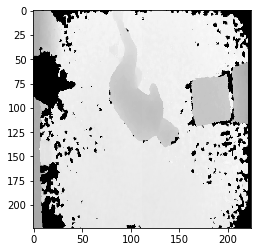

Image is [False]but was misclassified as [ True]


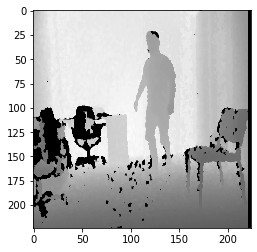

Image is [False]but was misclassified as [ True]


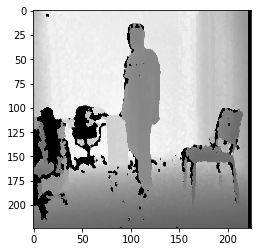

Image is [False]but was misclassified as [ True]


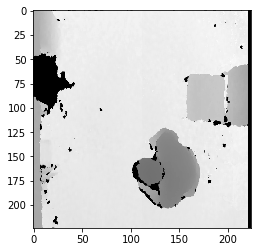

Image is [False]but was misclassified as [ True]


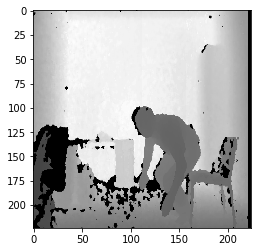

Image is [False]but was misclassified as [ True]


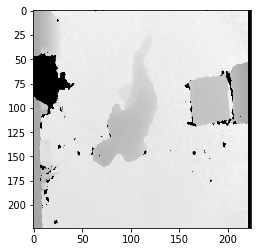

Image is [False]but was misclassified as [ True]


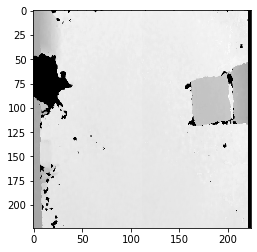

Image is [False]but was misclassified as [ True]


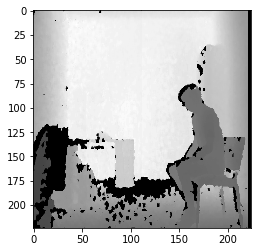

Image is [False]but was misclassified as [ True]


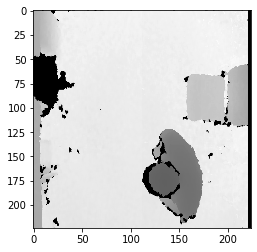

Image is [False]but was misclassified as [ True]


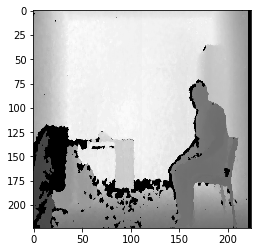

Image is [False]but was misclassified as [ True]


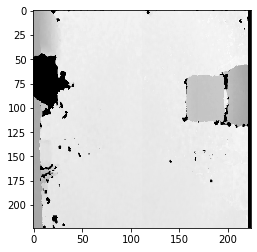

Image is [False]but was misclassified as [ True]


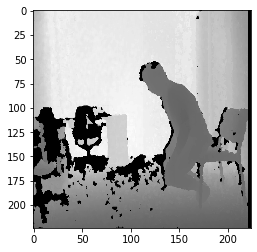

Image is [False]but was misclassified as [ True]


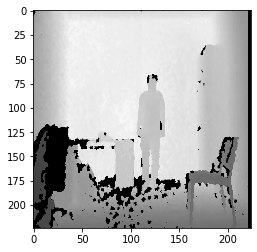

Image is [False]but was misclassified as [ True]


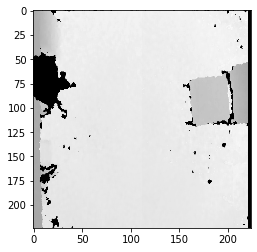

Image is [False]but was misclassified as [ True]


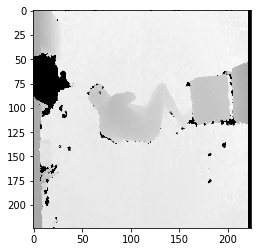

Image is [ True]but was misclassified as [False]


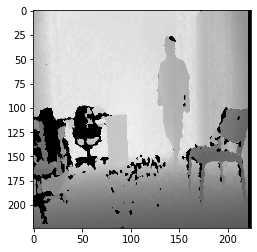

Image is [False]but was misclassified as [ True]


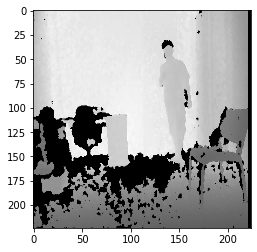

Image is [False]but was misclassified as [ True]


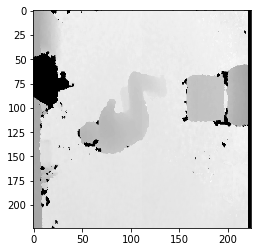

Image is [False]but was misclassified as [ True]


In [18]:
y_pred_edited = y_pred > 0.5

test = np.where(y_pred_edited != y_test)
incorrect_indices = test[0]

import matplotlib.pyplot as plt

index = incorrect_indices[0]

plt.imshow(X_test[index])
y_test[index]

for index in incorrect_indices[:100]:
    plt.imshow(X_test[index])
    plt.show()
    print("Image is " + str(y_test[index]) + "but was misclassified as " + str(y_pred_edited[index]))

In [12]:
np.save("y_pred_cnn_no_data_aug", y_pred)
np.save("y_test_cnn_no_data_aug", y_test)

array([ True])

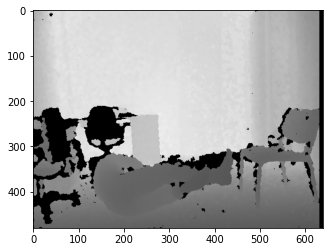

In [23]:
import matplotlib.pyplot as plt

plt.imshow(X_test[15])
y_test[15]

In [13]:
# false - not a fall , True - a fall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred > 0.5))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96      1382
        True       0.91      0.89      0.90       595

    accuracy                           0.94      1977
   macro avg       0.93      0.92      0.93      1977
weighted avg       0.94      0.94      0.94      1977



In [14]:
y_test_matrix = []
for i in y_test:
    y_test_matrix.append(i[0])
    
y_pred_matrix = []
y_pred_bool = y_pred > 0.5
for i in y_pred_bool:
    y_pred_matrix.append(i[0])

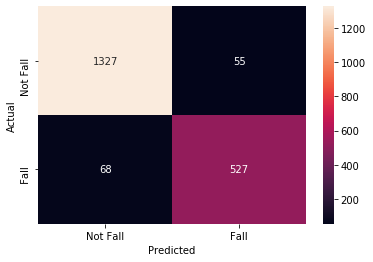

In [16]:
import matplotlib.pyplot as plt

import seaborn as sn
data = {'y_Actual':   y_test_matrix,
        'y_Predicted': y_pred_matrix
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])


sn.heatmap(confusion_matrix,xticklabels=['Not Fall', 'Fall'], yticklabels=[ 'Not Fall', ' Fall'],fmt='g', annot=True)
plt.show()

In [17]:
sample_data_dir = "samples"
def load_sample_data():
    imgs = []
    labels = []
    
    # Iterates through fall folders and the frames within each fall
    for img in os.listdir(sample_data_dir):
        file = os.path.join(sample_data_dir,img)
        print(file)
        if ("png" not in file):
            continue
        img = cv2.imread(file)
        img = cv2.resize(img ,(224,224))
        img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        imgs.append(img)
        if ("fall" in file):
            labels.append(1)
        else:
            labels.append(0)
            
                
    return imgs, labels

In [18]:
imgs, labels = load_sample_data()
imgs = np.asarray(imgs)
labels = np.asarray(labels)
predictions = model.predict(imgs)
pred = predictions >0.5

samples/fall4.png
samples/standing3.png
samples/fall.png
samples/fall3.png
samples/fall6.png
samples/standing1.png
samples/fall2.png
samples/fall5.png
samples/fall1.png
samples/standing2.png


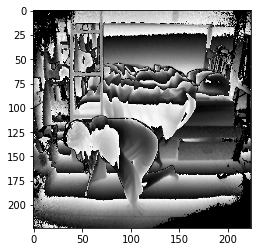

Image is classified by the model as:[False]


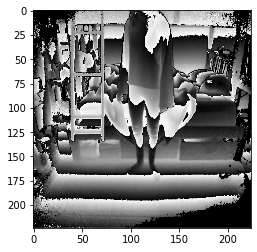

Image is classified by the model as:[False]


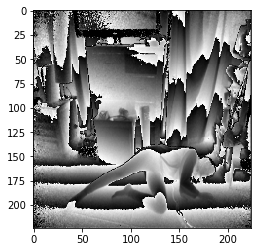

Image is classified by the model as:[False]


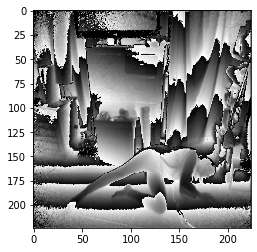

Image is classified by the model as:[False]


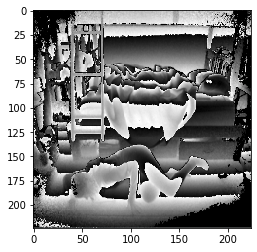

Image is classified by the model as:[False]


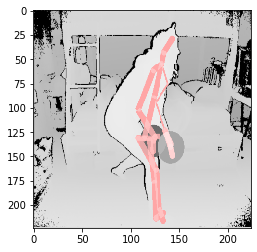

Image is classified by the model as:[False]


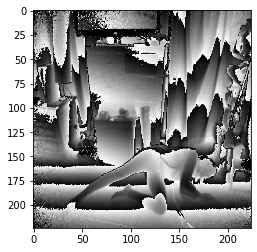

Image is classified by the model as:[False]


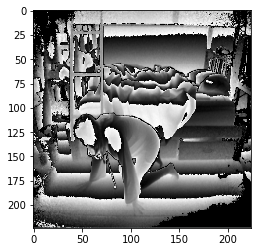

Image is classified by the model as:[False]


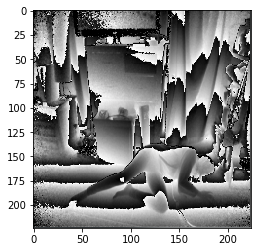

Image is classified by the model as:[False]


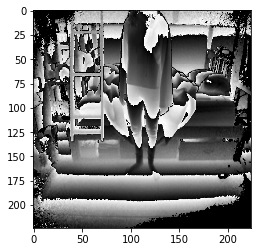

Image is classified by the model as:[False]


In [19]:
import matplotlib.pyplot as plt

for i, img in enumerate(imgs):
    plt.imshow(img)
    plt.show()
    print("Image is classified by the model as:" + str(pred[i]))